### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("scrabble_games.csv")
df.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
0,1,1,False,268,Harriette Lakernick,0,1568,1684,1,429,Patricia Barrett,0,1915,1872,3,1,1,1998-12-06,False
1,2,1,False,268,Harriette Lakernick,0,1568,1684,1,435,Chris Cree,0,1840,1798,6,2,1,1998-12-06,False
2,3,1,False,268,Harriette Lakernick,0,1568,1684,1,441,Caesar Jaramillo,0,1622,1606,10,3,1,1998-12-06,False
3,4,1,False,268,Harriette Lakernick,0,1568,1684,1,456,Mike Chitwood,0,1612,1600,9,4,1,1998-12-06,False
4,5,1,False,268,Harriette Lakernick,0,1568,1684,1,1334,Nancy Scott,0,1537,1590,4,6,1,1998-12-06,False


In [3]:
df.shape

(1542642, 19)

In [4]:
df.gameid.values

array([      1,       2,       3, ..., 1823781, 1823782, 1823783],
      dtype=int64)

In [ ]:
dupe = df[df.gameid.duplicated() == True]

In [ ]:
dupe

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
21567,22026,77,False,277,Mady Garner,0,1400,1409,2,2868,Jeanette Gibson,0,1242,1243,12,6,2,1999-06-26,False
21630,22088,77,False,2868,Jeanette Gibson,0,1242,1243,12,4866,Neil DeWitte,0,1349,1313,12,2,3,1999-06-26,False
21632,22089,77,False,2868,Jeanette Gibson,0,1242,1243,12,2744,Jerri Bergeron,0,1540,1506,5,3,3,1999-06-26,False
21634,22090,77,False,2868,Jeanette Gibson,0,1242,1243,12,1816,Toni Douglas,0,1357,1380,3,4,3,1999-06-26,False
21639,22094,77,False,3542,Stephen Dennis,0,1351,1404,1,2868,Jeanette Gibson,0,1242,1243,12,5,2,1999-06-26,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312955,1551751,8174,False,16334,John Green,407,875,882,7,16334,John Green,310,875,882,7,2,3,2013-08-04,False
1312957,1551752,8174,False,16334,John Green,418,875,882,7,19214,Dan Horowitz,241,953,913,12,5,3,2013-08-04,False
1312959,1551753,8174,False,16334,John Green,396,875,882,7,21684,Jennifer M Lee,312,698,714,10,6,3,2013-08-04,False
1312961,1551754,8174,False,16334,John Green,364,875,882,7,21684,Jennifer M Lee,282,698,714,10,7,3,2013-08-04,False


check if actually dupe --> yes

In [7]:
df[df.gameid == 22026]

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
21566,22026,77,False,277,Mady Garner,0,1400,1409,2,2868,Jeanette Gibson,0,1243,1280,7,6,2,1999-06-26,False
21567,22026,77,False,277,Mady Garner,0,1400,1409,2,2868,Jeanette Gibson,0,1242,1243,12,6,2,1999-06-26,False


In [8]:
scores = df[df.winnerscore != 0]
scores.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
2719,3131,13,False,33,Joey Mallick,521,1879,1881,2,3039,Norma Fisher,237,1726,1736,13,1,1,1999-01-15,False
2720,3132,13,False,33,Joey Mallick,488,1879,1881,2,2081,Chani Katz,262,1797,1772,14,2,1,1999-01-15,False
2721,3133,13,False,33,Joey Mallick,465,1879,1881,2,2072,Rita Dady,330,1661,1634,17,3,1,1999-01-15,False
2722,3134,13,False,33,Joey Mallick,467,1879,1881,2,5,Dennis Kaiser,304,1819,1842,5,4,1,1999-01-15,False
2723,3135,13,False,33,Joey Mallick,404,1879,1881,2,85,Tom Kelly,292,1736,1671,18,6,1,1999-01-15,False


In [9]:
scores.shape

(770780, 19)

### create dt index

In [10]:
scores.index = scores.date

In [11]:
scores.index = pd.to_datetime(scores.index)
scores.index

DatetimeIndex(['1999-01-15', '1999-01-15', '1999-01-15', '1999-01-15',
               '1999-01-15', '1999-01-15', '1999-01-15', '1999-01-15',
               '1999-01-15', '1999-01-15',
               ...
               '2017-03-04', '2017-03-04', '2017-03-04', '2017-03-04',
               '2017-03-04', '2017-03-04', '2017-03-04', '2017-03-04',
               '2017-03-04', '2017-03-04'],
              dtype='datetime64[ns]', name='date', length=770780, freq=None)

In [19]:
scores.sort_index()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,,,,
1976-12-05,695924,3743,False,9887,Joel Yudson,421,0,0,1,7652,Daniel Pratt,329,0,0,2,5,1,1976-12-05,False,750
1976-12-05,695925,3743,False,7653,Joan Weber,368,0,0,3,6269,Tim Maneth,351,0,0,999,1,1,1976-12-05,False,719
1977-02-01,695926,4589,False,1055,Jean Carol,374,0,0,1,1057,Anne Hay,274,0,0,3,4,1,1977-02-01,False,648
1977-02-27,695931,3874,False,11818,Robert Conroy Jr,321,0,0,999,3947,Frances Gross,320,0,0,4,1,1,1977-02-27,False,641
1977-02-27,695927,4592,False,11811,Lois Scott,277,0,0,1,7282,Vivian Thrash,262,0,0,5,4,1,1977-02-27,False,539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-05,1823606,9783,False,590,Debbie Stegman,433,1665,1661,5,18738,Adam Townsend,369,1633,1571,10,1,1,2017-03-05,False,802
2017-03-05,1823607,9783,False,590,Debbie Stegman,413,1665,1661,5,58,Sal Piro,395,1709,1679,8,2,1,2017-03-05,False,808
2017-03-05,1823608,9783,False,590,Debbie Stegman,477,1665,1661,5,242,Verna Richards Berg,308,1519,1476,9,4,1,2017-03-05,False,785


In [20]:
scores.loc['1999-11-01':'1999-12-31']

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,,,,
1999-11-03,1643568,1567,False,7217,Edward Metivier,476,2038,1890,88,7198,Matayo Bwire,342,1760,1783,52,6,1,1999-11-03,True,818
1999-11-03,1643567,1567,False,7217,Edward Metivier,411,2038,1890,88,7212,Vivian Penaflor,377,1592,1623,80,1,1,1999-11-03,True,788
1999-11-03,1643566,1567,False,6591,Roger Blom,408,1844,1825,87,57,Jim Nanavati,323,1831,1766,92,22,1,1999-11-03,True,731
1999-11-03,1643565,1567,False,6591,Roger Blom,414,1844,1825,87,7201,Wilma Warwick,324,1867,1866,56,18,1,1999-11-03,True,738
1999-11-03,1643564,1567,False,6591,Roger Blom,459,1844,1825,87,6697,Catherine Costello,393,1621,1712,85,17,1,1999-11-03,True,852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-12,42977,159,False,33,Joey Mallick,439,1903,1890,3,589,David Mallick,364,1662,1787,1,7,1,1999-11-12,False,803
1999-11-12,42976,159,False,33,Joey Mallick,410,1903,1890,3,983,Anita Rackham,330,1656,1604,15,6,1,1999-11-12,False,740
1999-11-12,42975,159,False,33,Joey Mallick,397,1903,1890,3,42,Rod MacNeil,386,1770,1714,13,4,1,1999-11-12,False,783


### start analysis

In [12]:
scores['combinedscore'] = scores['winnerscore'] + scores['loserscore']

C:\Users\alist\AppData\Local\Temp\ipykernel_9152\3343152831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['combinedscore'] = scores['winnerscore'] + scores['loserscore']


In [13]:
scores.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,,,,
1999-01-15,3131,13,False,33,Joey Mallick,521,1879,1881,2,3039,Norma Fisher,237,1726,1736,13,1,1,1999-01-15,False,758
1999-01-15,3132,13,False,33,Joey Mallick,488,1879,1881,2,2081,Chani Katz,262,1797,1772,14,2,1,1999-01-15,False,750
1999-01-15,3133,13,False,33,Joey Mallick,465,1879,1881,2,2072,Rita Dady,330,1661,1634,17,3,1,1999-01-15,False,795
1999-01-15,3134,13,False,33,Joey Mallick,467,1879,1881,2,5,Dennis Kaiser,304,1819,1842,5,4,1,1999-01-15,False,771
1999-01-15,3135,13,False,33,Joey Mallick,404,1879,1881,2,85,Tom Kelly,292,1736,1671,18,6,1,1999-01-15,False,696


### divide by experience level

In [ ]:
top = scores[scores.winneroldrating >= 500]
top = top.groupby(pd.Grouper(level= 'date', freq= '7D')).mean() #grouping avg by week 
top.head()

,gameid,tourneyid,tie,winnerid,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,loserscore,loseroldrating,losernewrating,loserpos,round,division,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,
1983-08-10,689182.538462,2029.0,0.0,3703.403846,427.076923,1984.903846,2021.961538,12.057692,3505.057692,384.884615,1994.153846,1998.173077,14.807692,9.826923,1.0,0.0,811.961538
1983-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
top.combinedscore #combined avg too high (what is it actually??) split by winner/loser

date
2000-01-12    773.522388
2000-02-16    796.918919
2000-02-23    765.200000
2000-03-01    790.000000
2000-03-29    795.440000
                 ...    
2017-02-01    741.626866
2017-02-08    755.882353
2017-02-15    782.545346
2017-02-22    770.722222
2017-03-01    765.353659
Name: combinedscore, Length: 797, dtype: float64

In [ ]:
top = top.dropna()

In [ ]:
top.shape

(1066, 17)

In [ ]:
top = top[top.index > '2000'] #take from 2000 to deal with data gaps & see trend better
top.head()

,gameid,tourneyid,tie,winnerid,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,loserscore,loseroldrating,losernewrating,loserpos,round,division,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,
2000-01-12,49591.029851,186.462687,0.0,1474.820896,431.970149,1869.373134,1881.417910,9.134328,1341.746269,341.552239,1831.567164,1829.761194,13.805970,9.268657,1.0,0.0,773.522388
2000-02-16,53580.216216,197.000000,0.0,784.972973,438.567568,1893.027027,1899.810811,7.540541,821.459459,358.351351,1883.432432,1879.351351,8.864865,9.972973,1.0,0.0,796.918919
2000-02-23,50973.733333,190.000000,0.0,1149.933333,418.000000,1822.533333,1815.933333,7.333333,1671.066667,347.200000,1782.200000,1764.133333,11.400000,8.000000,1.0,0.0,765.200000
2000-03-01,57659.272727,212.000000,0.0,915.818182,440.500000,1886.227273,1908.409091,3.272727,1052.954545,349.500000,1831.681818,1827.181818,4.818182,6.409091,1.0,0.0,790.000000
2000-03-29,58158.680000,213.000000,0.0,1186.920000,436.600000,1967.520000,1972.400000,5.640000,902.120000,358.840000,1948.120000,1944.240000,8.040000,7.000000,1.0,0.0,795.440000


### lower rating

In [ ]:
btm = scores[scores.winneroldrating < 500]
btm = btm.groupby(pd.Grouper(level= 'date', freq= '7D')).mean()
btm.head()

,gameid,tourneyid,tie,winnerid,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,loserscore,loseroldrating,losernewrating,loserpos,round,division,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,
1976-12-05,695924.5,3743.0,0.0,8770.0,394.5,0.0,0.0,2.0,6960.5,340.0,0.0,0.0,500.5,3.0,1.0,0.0,734.5
1976-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
btm = btm.dropna()

In [ ]:
btm.combinedscore.describe() #combined avg too high 4 trend split by winner/loser

count    779.000000
mean     692.947048
std       64.808290
min        8.000000
25%      668.676087
50%      690.615385
75%      713.661458
max      943.000000
Name: combinedscore, dtype: float64

In [ ]:
btm = btm[btm.index > '2000']
btm.head()

,gameid,tourneyid,tie,winnerid,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,loserscore,loseroldrating,losernewrating,loserpos,round,division,lexicon,combinedscore
date,,,,,,,,,,,,,,,,,
2000-05-21,66811.0,243.0,0.000000,678.000000,377.571429,0.0,1200.00000,7.000000,2217.285714,336.857143,1184.428571,1181.428571,7.857143,7.428571,3.000000,0.0,714.428571
2000-06-18,68589.5,250.0,0.000000,1268.400000,394.400000,0.0,882.20000,5.000000,3889.300000,292.300000,485.900000,793.200000,7.800000,7.700000,3.000000,0.0,686.700000
2000-06-25,1654067.0,4958.0,0.006369,2542.828025,394.267516,0.0,0.00000,5.159236,2502.968153,318.796178,0.000000,0.000000,7.853503,7.133758,1.942675,0.0,713.063694
2000-08-06,84507.5,283.0,0.000000,5473.021739,421.652174,0.0,1881.23913,34.413043,941.869565,342.434783,1831.760870,1824.108696,55.673913,16.456522,1.000000,0.0,764.086957
2000-09-17,89296.6,304.0,0.000000,1757.250000,385.350000,24.1,1011.70000,10.300000,1792.250000,307.300000,964.100000,977.150000,12.650000,6.950000,3.700000,0.0,692.650000


In [ ]:
''' 
use oldrating as initial -- before using new words

number of winners above rating --- 500 as marked based on ranking by state, lowest ranking rating is 671 
used this to demarcate more experienced players by: http://scrabbleplayers.org/w/Rating_system_overview, http://scrabbleplayers.org/ratings/bystate.html

since ppl are matched up against those of same level, compare scores with ratings above and below criteria after additions '''

### Visualize Data

In [25]:
dates = ['2006-03-01', '2015-04-10', '2016-09-01']

rel_dates = []
for string in dates:
    string = datetime.datetime.strptime(string,'%Y-%m-%d')
    rel_dates.append(string)

rel_dates

[datetime.datetime(2006, 3, 1, 0, 0),
 datetime.datetime(2015, 4, 10, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0)]

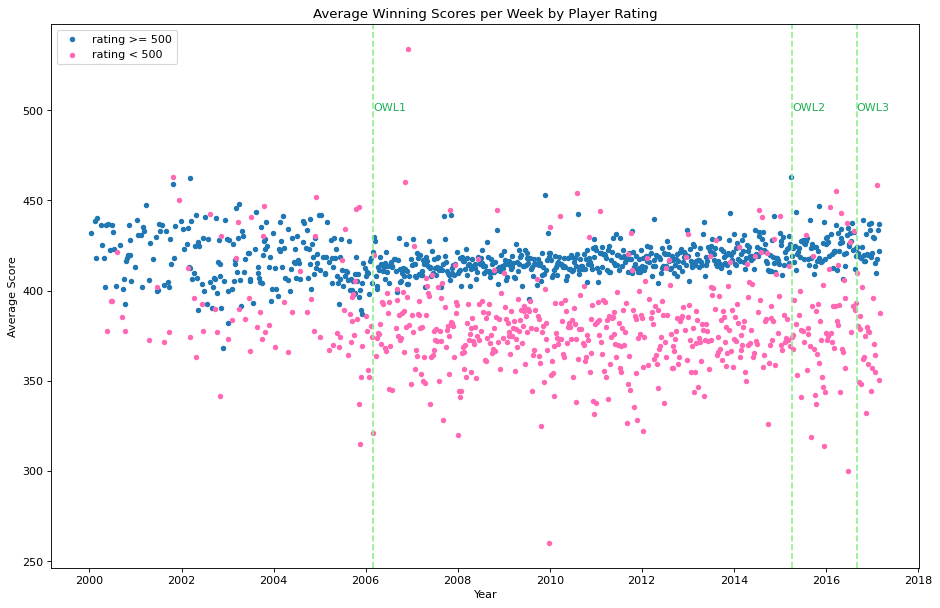

In [ ]:
fig = plt.figure(figsize= (14,9), dpi=80)
ax = fig.add_subplot(title = 'Average Winning Scores per Week by Player Rating')

ax.scatter(top.index, top.winnerscore, label='rating >= 500', s=15)
plt.scatter(btm.index, btm.winnerscore, color= 'hotpink', label= 'rating < 500', s=15)

ax.set_xlabel('Year')
ax.set_ylabel('Average Score')
plt.legend()

for i in range(len(rel_dates)):
    ax.axvline(rel_dates[i], color = 'lightgreen', linestyle = '--')
    ax.text(rel_dates[i], 500, 'OWL{}'.format(i+1), color='#1daf57')
            
#ax.axvline(datetime.datetime.strptime('2006-03-01','%Y-%m-%d'), color='lightgreen',linestyle='--')
plt.show()

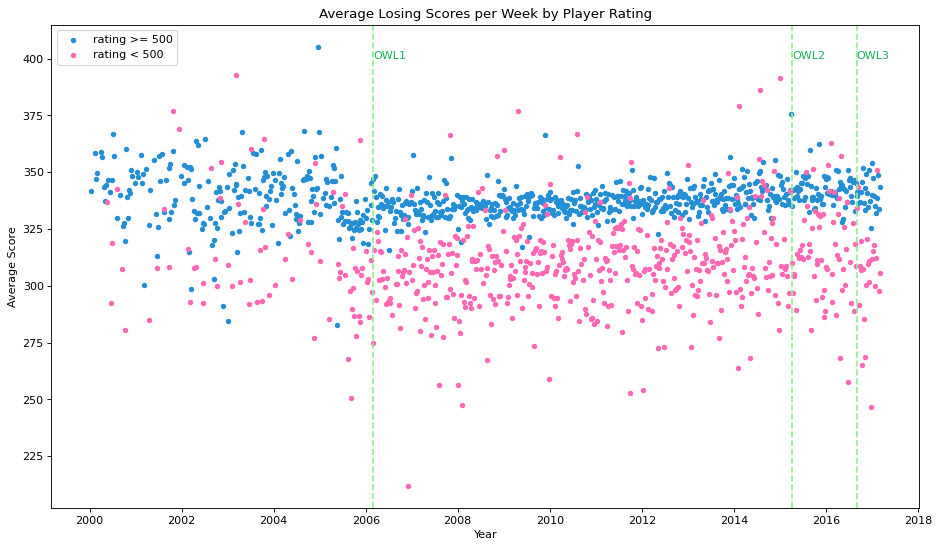

In [ ]:
fig = plt.figure(figsize= (14,8), dpi=80)
ax = fig.add_subplot(title = 'Average Losing Scores per Week by Player Rating')

ax.scatter(top.index, top.loserscore, color= '#258fd5', label='rating >= 500', s=15)#1f78b4
          
ax.scatter(btm.index, btm.loserscore, color= 'hotpink', label= 'rating < 500', s=15)

ax.set_xlabel('Year')
ax.set_ylabel('Average Score')
plt.legend()

for i in range(len(rel_dates)):
    ax.axvline(rel_dates[i], color = 'lightgreen', linestyle = '--')#25d56b
    ax.text(rel_dates[i], 400, 'OWL{}'.format(i+1), color='#1daf57')

#x = pd.to_datetime(scores.date)

#z = np.polyfit(x, top['loserscore'], 1) 
#p = np.poly1d(z)
#plt.plot(x,p(top['loserscore']),"r--")

plt.show()